In [69]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import collections as col

In [70]:
with open('train.csv',newline='') as csvfile:
    spamreader = csv.reader(csvfile)
    i=0
    #dic={}
    x_text = []
    time = []
    favoriteCount = []
    retweetCount = []
    yTr = []
    for row in spamreader:
        #only take id,text and label
        if i !=0:
            #dic.update({row[0]:[row[1],row[-1]]})
            x_text.append(row[1])
            favoriteCount.append(row[3])
            time.append(int(row[5].split(' ')[1].split(':')[0]))
            retweetCount.append(row[12])
            yTr.append(int(row[-1]))
        i += 1

In [71]:
time[1]


22

-1 is iPhone and 1 is Andoird 

## Time
If the twitter is posted from 9:00 to 15:00, it's highly possiable from Andorid phone. If the twitter is posted from 17:00 to 23:00, it's highly possiable from iPhone. See analysis below

In [72]:
yTr = np.array(yTr)
time = np.array(time)
favoriteCount = np.array(favoriteCount)
retweetCount = np.array(retweetCount)
Iphone_index = np.argwhere(yTr == -1).flatten()
Android_index = np.argwhere(yTr == 1).flatten()

In [73]:
time_iphone = time[Iphone_index]
time_android = time[Android_index]
iphone_counter = col.Counter(time_iphone)
android_counter = col.Counter(time_android)
print(iphone_counter)
print(iphone_counter.get('1'))

Counter({21: 47, 19: 39, 20: 35, 22: 34, 1: 33, 23: 32, 16: 31, 2: 30, 18: 28, 17: 26, 3: 24, 15: 21, 13: 17, 14: 16, 0: 15, 4: 11, 12: 9, 5: 9, 6: 8, 11: 3, 10: 1, 7: 1})
None


(0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)
(15, 33, 30, 24, 11, 9, 8, 1, 1, 3, 9, 17, 16, 21, 31, 26, 28, 39, 35, 47, 34, 32)


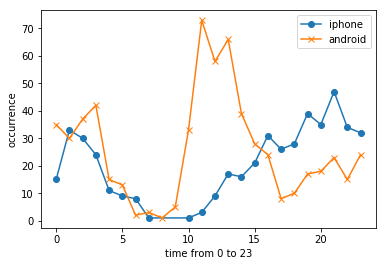

In [74]:
# x = np.arange(24)
# plt.plot(x,time_iphone)
# plt.show()
# iphone_counter.update({8:0,9:0})
lists = sorted(iphone_counter.items())
lists_android = sorted(android_counter.items())
x,y = zip(*lists)
x_a,y_a = zip(*lists_android)
print(x)
print(y)
plt.plot(x,y,marker='o',label = 'iphone')
plt.plot(x_a,y_a,marker='x',label = 'android')
plt.xlabel('time from 0 to 23')
plt.ylabel('occurrence')
plt.legend()
plt.show()

## Favorite Count
Seems like if the post has really high number of favorite count (> 100000), it's highly possible from iphone

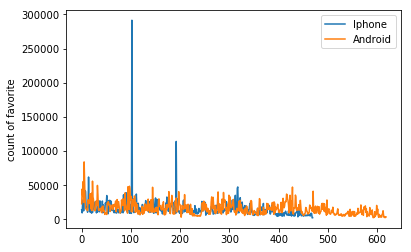

In [75]:
y_i = favoriteCount[Iphone_index]
x_i = np.arange(0,len(y_i))
y_an = favoriteCount[Android_index]
x_an = np.arange(0,len(y_an))
plt.plot(x_i,y_i,label = 'Iphone')
plt.plot(x_an,y_an,label='Android')
plt.ylabel('count of favorite')
plt.legend()
plt.show()

## Retweet Count
Seems like if the post has really high number of retweet count(>5000), it's highly possible from iphone

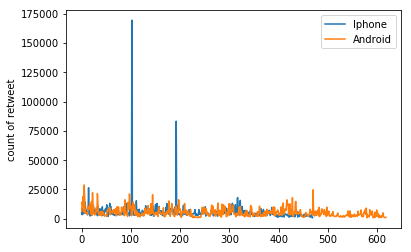

In [76]:
y_i = retweetCount[Iphone_index]
x_i = np.arange(0,len(y_i))
y_an = retweetCount[Android_index]
x_an = np.arange(0,len(y_an))
plt.plot(x_i,y_i,label = 'Iphone')
plt.plot(x_an,y_an,label='Android')
plt.ylabel("count of retweet")
plt.legend()
plt.show()

## Link in the text

We can see if the text contains link, then it's highly possible to be iPhone

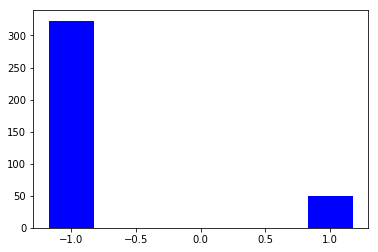

In [97]:
link_string = 'https://'
link_index = []
#get index of the elements with link
for i in range(len(x_text)):
    if link_string in x_text[i]:
        link_index.append(i)

y = yTr[link_index]
count_y = col.Counter(y)
pic_x = np.array([-1,1])
pic_y = np.array([count_y.get(-1),count_y.get(1)])
width = 0.35
plt.bar(pic_x,pic_y,width,color='b',align='center')
plt.show()

We can see if the text contains link, then it's highly possible to be iPhone